# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined = pd.merge(mouse_metadata, study_results, how='right')
# Display the data table for preview
Combined = Combined[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

number_of_mice = Combined['Mouse ID'].value_counts()
mice_roll_call = len(number_of_mice)
mice_roll_call 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = Combined.loc[Combined.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_list_df = Combined.loc[Combined['Mouse ID'] == 'g989', :]
duplicates_list_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_duplicates_df = Combined[Combined['Mouse ID'].isin(duplicate_id)== False]
dropped_duplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_list= dropped_duplicates_df['Mouse ID'].value_counts()
non_duplicated_mice= len(new_list)
non_duplicated_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_mean=dropped_duplicates_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_med=dropped_duplicates_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_var=dropped_duplicates_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_standev=dropped_duplicates_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_SEM=dropped_duplicates_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


summary_statistics = pd.DataFrame ({"Mean Tumor Volume": drug_regimen_mean, 
                                    "Median Tumor Volume":drug_regimen_med, 
                                    "Tumor Volume Variance":drug_regimen_var, 
                                    "Tumor Volume Standard Deviation": drug_regimen_standev, 
                                    "Tumor Volume Standard Error of the Mean": drug_regimen_SEM})

summary_statistics.style.format({"Mean Tumor Volume":'{:.2f}',
                                "Median Tumor Volume":'{:.2f}',
                                "Tumor Volume Variance":'{:.2f}',
                                "Tumor Volume Standard Deviation":'{:.2f}',
                                "Tumor Volume Standard Error of the Mean":'{:.2f}'})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggregate_table = dropped_duplicates_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem']) 
aggregate_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

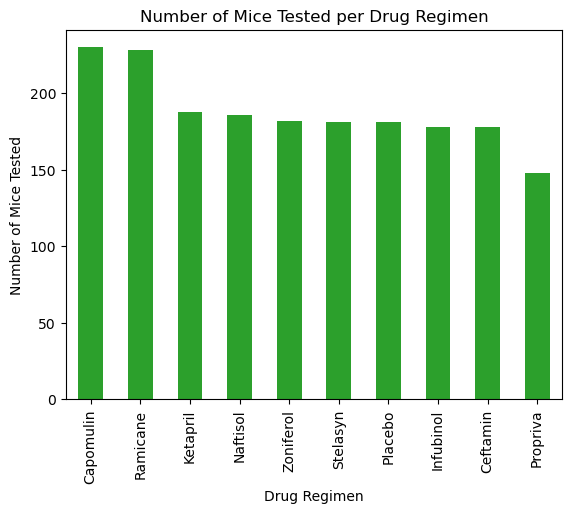

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = dropped_duplicates_df['Drug Regimen'].value_counts()

bar_graph_mice_drugregimen= mice_tested.plot.bar(color='tab:green')

plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.title("Number of Mice Tested per Drug Regimen")

plt.show()



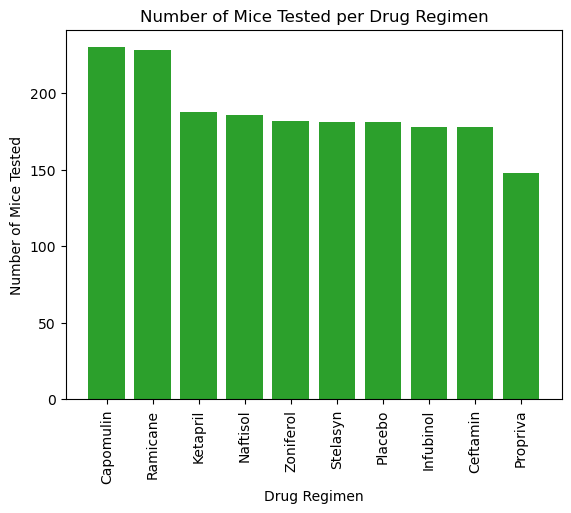

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = mice_tested.values
x_axis = mice_tested.index.values

plt.bar(x_axis, y_axis,color='tab:green', alpha=1, align='center')

plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.title("Number of Mice Tested per Drug Regimen")

plt.show()


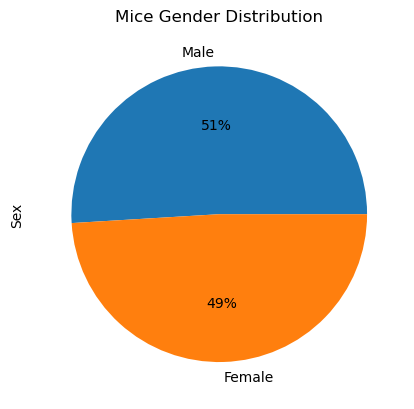

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_distribution = dropped_duplicates_df['Sex'].value_counts()
mice_gender_distribution.plot.pie(autopct='%1.0f%%')

plt.title('Mice Gender Distribution')
plt.show()

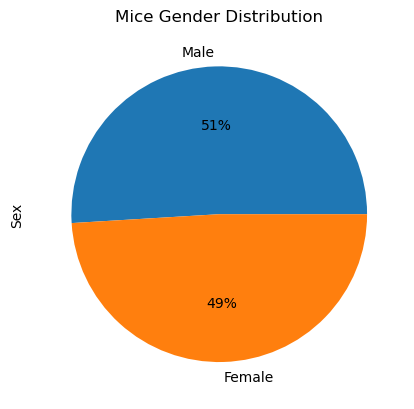

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49, 50]
plot = mice_gender_distribution.plot.pie(y='Total Count', autopct="%1.0f%%")
plt.title('Mice Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [14]:
mouse_id_number = Combined.groupby(['Mouse ID']).max()
mouse_id_reset = mouse_id_number.reset_index()

mouseid_timepoint = mouse_id_reset[['Mouse ID', 'Timepoint']].\
    merge(Combined, on=['Mouse ID', 'Timepoint'], how = "left")

def get_outliers(regimen):
    regimens = mouseid_timepoint.loc[mouseid_timepoint['Drug Regimen']== regimen]['Tumor Volume (mm3)']
    
    quartiles = regimens.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
    outliers = regimens.loc[(regimens < lower_bound) | (regimens > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimens

capomulin = get_outliers("Capomulin")
ramicane = get_outliers("Ramicane")
infubinol = get_outliers("Infubinol")
ceftamin = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
drug_regimens =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_list= Combined[Combined["Drug Regimen"].isin(drug_regimens)]
drug_list.head()

last_timepoint_for_each_mouse = drug_list.groupby(["Drug Regimen", "Mouse ID"]).agg(size =("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint_for_each_mouse = last_timepoint_for_each_mouse.stack(level=0).unstack(level=0) 

treatment = 0
for drug_list in drug_regimens:
    quartiles = last_timepoint_for_each_mouse[drug_list].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug_list} treatments is: {lowerq}")
    print(f"The upper quartile of {drug_list} treatments is: {upperq}")
    print(f"The interquartile range of {drug_list} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug_list} outliers.")
    print(f"Values above {upper_bound} could be {drug_list} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1  



------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

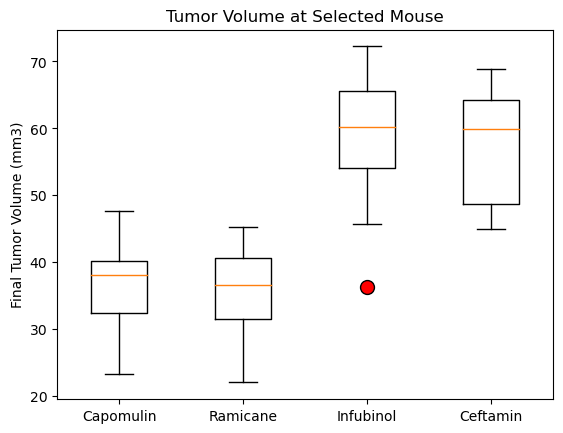

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

final_tumor_volume_for_each_mouse= dict(markerfacecolor = "red", markersize=10)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= final_tumor_volume_for_each_mouse)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

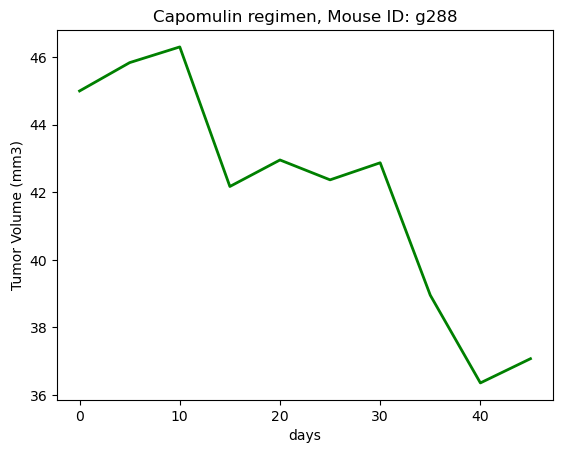

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_treatment_df = dropped_duplicates_df.loc[dropped_duplicates_df["Drug Regimen"] == "Capomulin",:]
lineplot = Capomulin_treatment_df.loc[Capomulin_treatment_df["Mouse ID"] == "g288",:]
lineplot.head()
x_axis = lineplot["Timepoint"]
tumsiz = lineplot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin regimen, Mouse ID: g288')
plt.plot(x_axis, tumsiz,linewidth=2,color="green", label="Fahreneit")
plt.xlabel('days')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

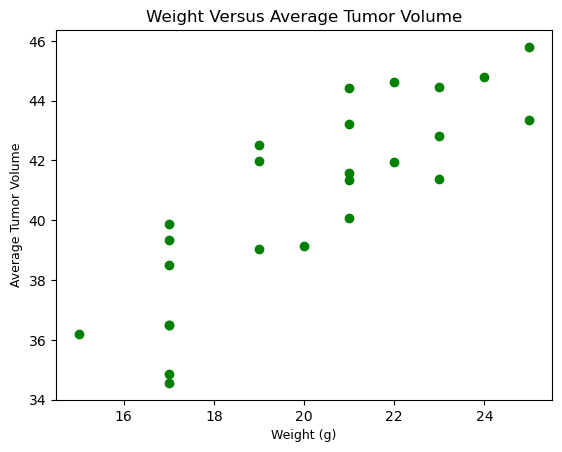

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
mean_capomulin = Capomulin_treatment_df.groupby(['Mouse ID']).mean()

marker_size=18
plt.scatter(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'], color="green")
plt.xlabel('Weight (g)',fontsize =9)
plt.ylabel('Average Tumor Volume',fontsize =9)
plt.title('Weight Versus Average Tumor Volume')
plt.show()

## Correlation and Regression

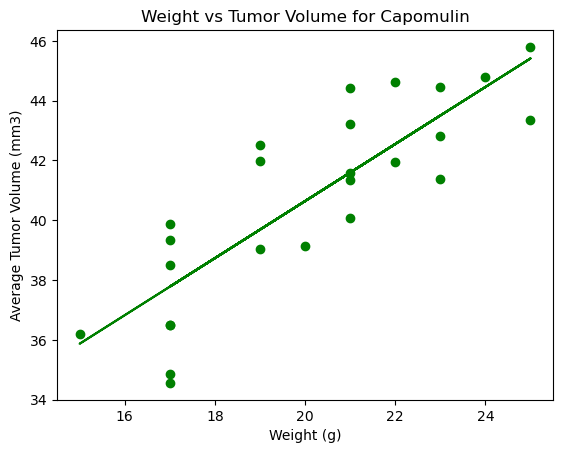

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation_plot = st.pearsonr(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'])

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(mean_capomulin['Weight (g)'], mean_capomulin['Tumor Volume (mm3)'])
Values_for_regression = mean_capomulin["Weight (g)"]* slope + intercept

plt.scatter(mean_capomulin['Weight (g)'],mean_capomulin['Tumor Volume (mm3)'], color="green") 
plt.plot(mean_capomulin['Weight (g)'], Values_for_regression, color='green')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()